In [1]:
import pandas as pd
import ast
import matplotlib.pyplot as plt

### Datan esikäsittely ja muuttujien valinta

#### Alustava tarkastelu

Sarakkeet arvioitiin niiden ennustettavan muuttujan kannalta merkittävyyden perusteella. Merkityksettömät sarakkeet, kuten yksilölliset tunnisteet tai sarakkeet, joissa oli runsaasti puuttuvia arvoja, poistettiin.

In [2]:
initial_columns = [
    'vin','body_type', 'city_fuel_economy', 'daysonmarket', 'engine_type', 'fleet', 'frame_damaged', 'franchise_dealer',
    'fuel_tank_volume', 'fuel_type', 'has_accidents', 'highway_fuel_economy', 'horsepower', 'isCab', 'is_new', 'listing_color',
    'major_options', 'make_name', 'maximum_seating', 'mileage', 'model_name', 'owner_count', 'power', 'price', 'savings_amount',
    'seller_rating', 'torque', 'transmission', 'wheel_system', 'year', 'width', 'length'
]

In [3]:
df = pd.read_csv('../../used_cars_data.csv', nrows=300000, usecols=initial_columns, low_memory=False)

In [4]:
df.isna().sum() / len(df) * 100

vin                      0.000000
body_type                0.410333
city_fuel_economy       16.521333
daysonmarket             0.000000
engine_type              3.023333
fleet                   44.818333
frame_damaged           44.818333
franchise_dealer         0.000000
fuel_tank_volume         4.889667
fuel_type                2.470333
has_accidents           44.818333
highway_fuel_economy    16.521333
horsepower               5.242333
isCab                   44.818333
is_new                   0.000000
length                   4.889667
listing_color            0.000000
major_options            7.566667
make_name                0.000000
maximum_seating          4.889667
mileage                  4.254000
model_name               0.000000
owner_count             47.656667
power                   14.828000
price                    0.000000
savings_amount           0.000000
seller_rating            1.413667
torque                  15.924000
transmission             1.390000
wheel_system  

In [5]:
# laske puuttuvien arvojen prosenttimäärä
missing_percentages = (df.isna().sum() / len(df)) * 100

# Etsi sarakkeet joissa on yli 50% puuttuvia arvoja
columns_to_drop = missing_percentages[missing_percentages >= 50].index

# Pudota sarakkeet
df_cleaned = df.drop(columns=columns_to_drop)

# siivottu df
print(f"Columns dropped: {list(columns_to_drop)}")

Columns dropped: []


In [6]:
df_cleaned.head()

,vin,body_type,city_fuel_economy,daysonmarket,engine_type,fleet,frame_damaged,franchise_dealer,fuel_tank_volume,fuel_type,...,owner_count,power,price,savings_amount,seller_rating,torque,transmission,wheel_system,width,year
0,ZACNJABB5KPJ92081,SUV / Crossover,NaN,522,I4,NaN,NaN,True,12.7 gal,Gasoline,...,NaN,"177 hp @ 5,750 RPM",23141.0,0,2.8,"200 lb-ft @ 1,750 RPM",A,FWD,79.6 in,2019
1,SALCJ2FX1LH858117,SUV / Crossover,NaN,207,I4,NaN,NaN,True,17.7 gal,Gasoline,...,NaN,"246 hp @ 5,500 RPM",46500.0,0,3.0,"269 lb-ft @ 1,400 RPM",A,AWD,85.6 in,2020
2,JF1VA2M67G9829723,Sedan,17.0,1233,H4,False,False,True,15.9 gal,Gasoline,...,3.0,"305 hp @ 6,000 RPM",46995.0,0,NaN,"290 lb-ft @ 4,000 RPM",M,AWD,78.9 in,2016
3,SALRR2RV0L2433391,SUV / Crossover,NaN,196,V6,NaN,NaN,True,23.5 gal,Gasoline,...,NaN,"340 hp @ 6,500 RPM",67430.0,0,3.0,"332 lb-ft @ 3,500 RPM",A,AWD,87.4 in,2020
4,SALCJ2FXXLH862327,SUV / Crossover,NaN,137,I4,NaN,NaN,True,17.7 gal,Gasoline,...,NaN,"246 hp @ 5,500 RPM",48880.0,0,3.0,"269 lb-ft @ 1,400 RPM",A,AWD,85.6 in,2020


### Erotetaan length, width ja maximum_seating sarakkeista kirjaimet ja muutetaan ne float muotoon

In [7]:
columns_to_clean = ['length', 'width']

for col in columns_to_clean:
    df_cleaned[col] = pd.to_numeric(
        df_cleaned[col].astype(str).str.replace(' in', '', regex=False),
        errors='coerce'
    )

for col in columns_to_clean:
    df_cleaned[col] = df_cleaned[col].fillna(df_cleaned[col].median())


df_cleaned['fuel_tank_volume'] = pd.to_numeric(
    df_cleaned['fuel_tank_volume'].astype(str).str.replace(' gal', '', regex=False),
    errors='coerce'
)

In [8]:
df_cleaned['maximum_seating'] = df_cleaned['maximum_seating'].str.extract(r'(\d+)', expand=False)
df_cleaned['maximum_seating'] = pd.to_numeric(df_cleaned['maximum_seating'])
df_cleaned['maximum_seating'] = df_cleaned['maximum_seating'].fillna(df_cleaned['maximum_seating'].median())

In [9]:
df_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300000 entries, 0 to 299999
Data columns (total 32 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   vin                   300000 non-null  object 
 1   body_type             298769 non-null  object 
 2   city_fuel_economy     250436 non-null  float64
 3   daysonmarket          300000 non-null  int64  
 4   engine_type           290930 non-null  object 
 5   fleet                 165545 non-null  object 
 6   frame_damaged         165545 non-null  object 
 7   franchise_dealer      300000 non-null  bool   
 8   fuel_tank_volume      285162 non-null  float64
 9   fuel_type             292589 non-null  object 
 10  has_accidents         165545 non-null  object 
 11  highway_fuel_economy  250436 non-null  float64
 12  horsepower            284273 non-null  float64
 13  isCab                 165545 non-null  object 
 14  is_new                300000 non-null  bool   
 15  

### Luo 'torque' sarakkeesta kaksi uutta saraketta 'torgue_value' ja 'torque_rpm' ja täyttää ne mediaanilla

In [10]:
df_cleaned[['torque_value', 'torque_rpm']] = df_cleaned['torque'].str.extract(r'(\d+)\s+lb-ft\s+@\s+([\d,]+)', expand=True)
df_cleaned['torque_value'] = pd.to_numeric(df_cleaned['torque_value'])
df_cleaned['torque_rpm'] = pd.to_numeric(df_cleaned['torque_rpm'].str.replace(',', '', regex=False))

# Täytä Nan arvot mediaanilla
df_cleaned['torque_value'] = df_cleaned['torque_value'].fillna(df_cleaned['torque_value'].median())
df_cleaned['torque_rpm'] = df_cleaned['torque_rpm'].fillna(df_cleaned['torque_rpm'].median())


df_cleaned.drop(columns=['torque'], inplace=True)

### Otetaan 'power' sarakkeesta RPM tiedot ja luodaan näistä uusi sarake power_rpm

In [11]:
# Ota rpm tiedot power sarakkeesta
df_cleaned['power_rpm'] = df_cleaned['power'].str.extract(r'@ ([\d,]+) RPM', expand=True)

# poista pilkut ja muuta numeeriseen muotoon
df_cleaned['power_rpm'] = pd.to_numeric(df_cleaned['power_rpm'].str.replace(',', '', regex=False), errors='coerce')

# poistetaan alkuperäinen sarake
df_cleaned.drop(columns=['power'], inplace=True)

df_cleaned['power_rpm'] = df_cleaned['power_rpm'].fillna(df_cleaned['power_rpm'].median())

In [12]:
df_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300000 entries, 0 to 299999
Data columns (total 33 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   vin                   300000 non-null  object 
 1   body_type             298769 non-null  object 
 2   city_fuel_economy     250436 non-null  float64
 3   daysonmarket          300000 non-null  int64  
 4   engine_type           290930 non-null  object 
 5   fleet                 165545 non-null  object 
 6   frame_damaged         165545 non-null  object 
 7   franchise_dealer      300000 non-null  bool   
 8   fuel_tank_volume      285162 non-null  float64
 9   fuel_type             292589 non-null  object 
 10  has_accidents         165545 non-null  object 
 11  highway_fuel_economy  250436 non-null  float64
 12  horsepower            284273 non-null  float64
 13  isCab                 165545 non-null  object 
 14  is_new                300000 non-null  bool   
 15  

### Lasketaan loppuihin int ja float arvoja sijaiseviin sarakkaiseen mediaani

In [13]:
df_cleaned['city_fuel_economy'] = df_cleaned['city_fuel_economy'].fillna(df_cleaned['city_fuel_economy'].median())
df_cleaned['fuel_tank_volume'] = df_cleaned['fuel_tank_volume'].fillna(df_cleaned['fuel_tank_volume'].median())
df_cleaned['highway_fuel_economy'] = df_cleaned['highway_fuel_economy'].fillna(df_cleaned['highway_fuel_economy'].median())
df_cleaned['horsepower'] = df_cleaned['horsepower'].fillna(df_cleaned['horsepower'].median())
df_cleaned['mileage'] = df_cleaned['mileage'].fillna(df_cleaned['mileage'].median())
df_cleaned['owner_count'] = df_cleaned['owner_count'].fillna(df_cleaned['owner_count'].median())
df_cleaned['seller_rating'] = df_cleaned['seller_rating'].fillna(df_cleaned['seller_rating'].median())

In [14]:
df_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300000 entries, 0 to 299999
Data columns (total 33 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   vin                   300000 non-null  object 
 1   body_type             298769 non-null  object 
 2   city_fuel_economy     300000 non-null  float64
 3   daysonmarket          300000 non-null  int64  
 4   engine_type           290930 non-null  object 
 5   fleet                 165545 non-null  object 
 6   frame_damaged         165545 non-null  object 
 7   franchise_dealer      300000 non-null  bool   
 8   fuel_tank_volume      300000 non-null  float64
 9   fuel_type             292589 non-null  object 
 10  has_accidents         165545 non-null  object 
 11  highway_fuel_economy  300000 non-null  float64
 12  horsepower            300000 non-null  float64
 13  isCab                 165545 non-null  object 
 14  is_new                300000 non-null  bool   
 15  

### True/False-sarakkeiden muuntaminen

Jotta pystymme mallintamisessa hyödyntämään boolean tyylisiä sarakkeita, on ne muutettava alkuperäisestä muodostaan numeerisiksi arvoiksi.

In [15]:
# Muuttaa True False ja NaN arvot numeerisiksi
replacements = {True: '1', False: '0'}

# Kohdennetaan toimenpide haluttuun sarakkeeseen ja muutetaan tietotyyppi sopivaksi
df_cleaned['fleet'] = df_cleaned['fleet'].map(replacements)
df_cleaned['fleet'] = df_cleaned['fleet'].fillna(-1).astype('int64')

df_cleaned['frame_damaged'] = df_cleaned['frame_damaged'].map(replacements)
df_cleaned['frame_damaged'] = df_cleaned['frame_damaged'].fillna(-1).astype('int64')

df_cleaned['franchise_dealer'] = df_cleaned['franchise_dealer'].map(replacements)
df_cleaned['franchise_dealer'] = df_cleaned['franchise_dealer'].fillna(-1).astype('int64')

df_cleaned['has_accidents'] = df_cleaned['has_accidents'].map(replacements)
df_cleaned['has_accidents'] = df_cleaned['has_accidents'].fillna(-1).astype('int64')

df_cleaned['isCab'] = df_cleaned['isCab'].map(replacements)
df_cleaned['isCab'] = df_cleaned['isCab'].fillna(-1).astype('int64')

df_cleaned['is_new'] = df_cleaned['is_new'].map(replacements)
df_cleaned['is_new'] = df_cleaned['is_new'].fillna(-1).astype('int64')


print("\n-----Tietotyyppien yhteenveto:")
print(df_cleaned.dtypes.value_counts())
print(df_cleaned.dtypes.to_string())
print("\n-----Data:\n")
print(df_cleaned)


-----Tietotyyppien yhteenveto:
float64    14
object     10
int64       9
Name: count, dtype: int64
vin                      object
body_type                object
city_fuel_economy       float64
daysonmarket              int64
engine_type              object
fleet                     int64
frame_damaged             int64
franchise_dealer          int64
fuel_tank_volume        float64
fuel_type                object
has_accidents             int64
highway_fuel_economy    float64
horsepower              float64
isCab                     int64
is_new                    int64
length                  float64
listing_color            object
major_options            object
make_name                object
maximum_seating         float64
mileage                 float64
model_name               object
owner_count             float64
price                   float64
savings_amount            int64
seller_rating           float64
transmission             object
wheel_system             object
widt

Nyt nähdään yhteenvedoista, kuinka tietotyypit halutuissa sarakkeissa ollaan muutettu objekteista ja booleanista 'int64'-tietotyypiksi.

### Selite uusille arvoille:

- **1:** Vastaa totuusarvoa 'True', jolloin väittämä pitää paikkansa. Esimerkiksi sarakkeessa 'is_new', arvo '1' tarkoittaa, että auto **on uusi**.

- **0:** Vastaa totuusarvoa 'False, jolloin väittämä ei pidä paikkansa. Esimerkiksi sarakkeessa 'is_new', arvo '0' tarkoittaa, että auto **ei ole uusi**.

- **-1:** Ei vastaa kumpaakaan yllämainittua totuusarvoa, vaan se on tyhjäarvo. Esimerkiksi sarakkeessa 'is_new', arvo '-1' tarkoittaa, että **ei tiedetä onko auto uusi vai vanha**.

## Major options sarakkeen purku

Seuraavaksi avataan "major_options" sarake. Sarakkeessa on lueteltu myytävän auton lisävarusteita. Osassa autoissa lisävarustelista oli erittäin pitkä (57kpl), niin päätimme ottaa mukaan vain selkeästi yleisimmät lisävarusteet. Alla olevassa koodiblockissa "major_options" -solun sisältö dekoodataan listamuotoon ja lasketaan kunkin listan alkion osumien määrä testidatasetissä.

In [16]:
df_cleaned['major_options'] = df_cleaned['major_options'].apply(lambda x: ast.literal_eval(x) if isinstance(x, str) else x)

all_options = [item for sublist in df_cleaned['major_options'].dropna() for item in sublist]

counts = {}
for option in all_options:
    if option in counts:
        counts[option] += 1
    else:
        counts[option] = 1

top_20_counts = dict(sorted(counts.items(), key=lambda item: item[1], reverse=True)[:20])

20 yleisintä "major_options" -sarakkeen listojen alkiota on tallennettu nyt muuttujaan "top_20_counts". Seuraavaksi piirretään simppeli pylväsdiagrammikuva, josta on helpompi arvioida, montako yleisintä "major_options":ia on mielekästä ottaa.

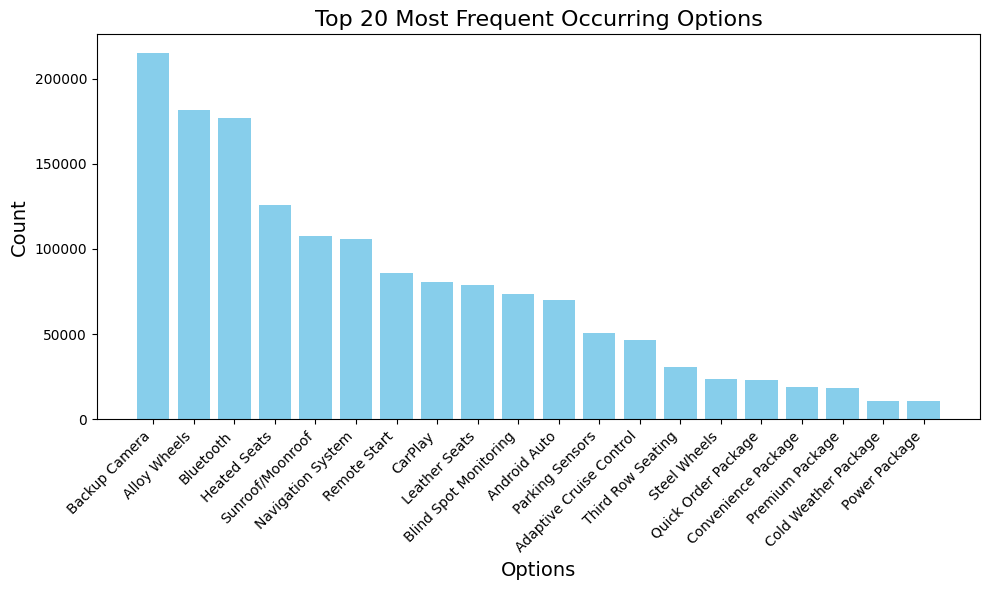

In [17]:
plt.figure(figsize=(10, 6))
plt.bar(top_20_counts.keys(), top_20_counts.values(), color='skyblue')

plt.xlabel('Options', fontsize=14)
plt.ylabel('Count', fontsize=14)
plt.title('Top 20 Most Frequent Occurring Options', fontsize=16)
plt.xticks(rotation=45, ha='right')

plt.tight_layout()
plt.show()

Valitsimme 13 ensimmäistä "major_optionss":ia, sillä ne olivat selkeästi yleisimpiä ja ns. universaalimpia, kuin erilaiset "packaget". Tehtävän aikana tutkimme yllä olevaa listaa huomattavasti kauemmas ja lähes jokainen lisävaruste tästä eteenpäin on vain "package".

Alla olevassa koodiblockissa tallennamme major_options_listiin valitut lisävarusteet. Luomme kullekkin lisävarusteelle oman sarakkeen, jonka täytämme 1 tai 0 arvolla, riippuen, onko kunkin auton "major_options" sarakkeessa ilmoitettu ko. lisävaruste. Lopuksi poistamme turhaksi jääneen "major_options" sarakkeen.

In [18]:
major_options_list = [
    'Backup Camera', 'Alloy Wheels', 'Bluetooth', 'Heated Seats', 'Sunroof/Moonroof',
    'Navigation System', 'Remote Start', 'Leather Seats', 'CarPlay', 'Blind Spot Monitoring',
    'Android Auto', 'Parking Sensors', 'Adaptive Cruise Control'
]

for option in major_options_list:
    df_cleaned[option] = df_cleaned['major_options'].apply(lambda x: 1 if isinstance(x, list) and option in x else 0)

df_cleaned = df_cleaned.drop(columns=['major_options'])

## Major options korrelaatio
Mielenkiinnosta halusimme lisätä vielä valittujen lisälaitteiden korrelaation hintaan, sillä olimme uteliatia, onko jollain lisävarusteella selkeää korrelaatiota auton hintaan. Yllätykseksi "Navigation system", eli navigointijärjestelmällä oli voimakkain korrelaatiohintaan.

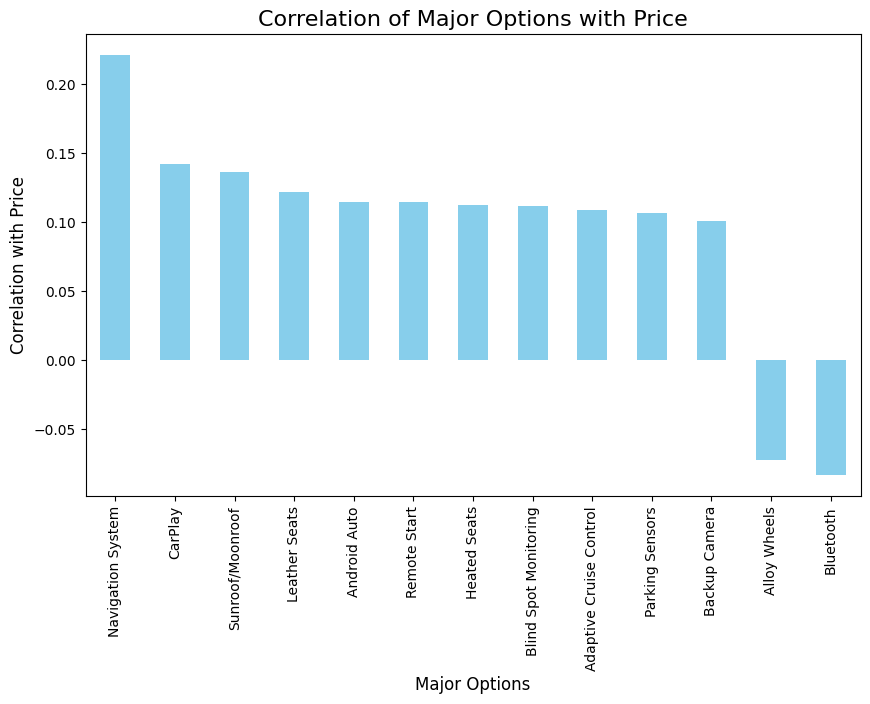

In [19]:
correlations = df_cleaned[major_options_list].corrwith(df_cleaned['price'])


correlations.sort_values(ascending=False).plot(kind='bar', color='skyblue', figsize=(10, 6))

plt.title('Correlation of Major Options with Price', fontsize=16)
plt.xlabel('Major Options', fontsize=12)
plt.ylabel('Correlation with Price', fontsize=12)
plt.xticks(rotation=90)
plt.show()

## Polttoainekulutuksen muuntaminen
Päätimme muuttaa autojen ilmoitetun polttoainekulutuksen amerikkalaisesta mil/l eurooppalaiseen muotoon l/100km. Loimme funktion, jonka ajoimme kullekkin polttoainekulutussarakkeelle

In [20]:
def fuel_unit_conversion(km_per_l, decimals=2):
    if pd.isna(km_per_l):
        return km_per_l
    return round(100 / km_per_l, decimals)

df_cleaned['city_fuel_economy'] = df_cleaned['city_fuel_economy'].apply(fuel_unit_conversion)
#df_cleaned['combine_fuel_economy'] = df_cleaned['combine_fuel_economy'].apply(fuel_unit_conversion)
df_cleaned['highway_fuel_economy'] = df_cleaned['highway_fuel_economy'].apply(fuel_unit_conversion)

## Kategoristen sarakkeiden arvojen muuntaminen numeeriseen muotoon
Tulostetaan aluksi sarakkeiden tyypit ja sarakkeet, jotka eivät ole numeerisessa muodossa.

In [21]:
# Kaikkien sarakkeiden tyypit
print(df_cleaned.dtypes.value_counts())

int64      22
float64    14
object      9
Name: count, dtype: int64


In [22]:
# Object sarakkeiden uniikkien arvojen määrä
df_cleaned.select_dtypes(include='object').nunique()

vin              300000
body_type             9
engine_type          32
fuel_type             7
listing_color        15
make_name            69
model_name         1070
transmission          4
wheel_system          5
dtype: int64

Valitaan sarakkeet, jotka halutaan muuttaa kategoriseen muotoon.

In [23]:
columns_to_encode = ['body_type', 'engine_type', 'fuel_type', 'listing_color', 'make_name', 'model_name', 'transmission', 'wheel_system']

Luodaan kategorisista sarakkeista uudet sarakkeet, joissa on enkoodatut arvot. Alkuperäiset sarakkeet jätetään dataframeen varmuuden vuoksi. 

In [24]:
# 'df_cleaned[f'{col}_encoded']' luo uuden sarakkeen ja '.cat.codes' asettaa uniikin arvon jokaiselle kategorialle
for col in columns_to_encode:
    df_cleaned[f'{col}_encoded'] = df_cleaned[col].astype('category').cat.codes

Alle on tulostettu uudet ja alkuperäiset sarakkeet vierekkäin.

In [25]:
df_cleaned[
    ['body_type_encoded','body_type', 'engine_type_encoded', 'engine_type', 'fuel_type_encoded', 'fuel_type', 'listing_color_encoded', 'listing_color', 
     'make_name_encoded', 'make_name', 'model_name_encoded', 'model_name', 'transmission_encoded', 'transmission','wheel_system_encoded' ,'wheel_system']
     ].head(10)

,body_type_encoded,body_type,engine_type_encoded,engine_type,fuel_type_encoded,fuel_type,listing_color_encoded,listing_color,make_name_encoded,make_name,model_name_encoded,model_name,transmission_encoded,transmission,wheel_system_encoded,wheel_system
0,5,SUV / Crossover,5,I4,5,Gasoline,14,YELLOW,29,Jeep,793,Renegade,0,A,3,FWD
1,5,SUV / Crossover,5,I4,5,Gasoline,0,BLACK,34,Land Rover,306,Discovery Sport,0,A,2,AWD
2,6,Sedan,0,H4,5,Gasoline,12,UNKNOWN,61,Subaru,1009,WRX STI,3,M,2,AWD
3,5,SUV / Crossover,18,V6,5,Gasoline,4,GRAY,34,Land Rover,304,Discovery,0,A,2,AWD
4,5,SUV / Crossover,5,I4,5,Gasoline,0,BLACK,34,Land Rover,306,Discovery Sport,0,A,2,AWD
5,5,SUV / Crossover,5,I4,5,Gasoline,12,UNKNOWN,34,Land Rover,783,Range Rover Velar,0,A,2,AWD
6,6,Sedan,5,I4,5,Gasoline,10,SILVER,42,Mazda,582,MAZDA3,0,A,3,FWD
7,5,SUV / Crossover,5,I4,5,Gasoline,13,WHITE,34,Land Rover,783,Range Rover Velar,0,A,2,AWD
8,5,SUV / Crossover,5,I4,5,Gasoline,4,GRAY,34,Land Rover,306,Discovery Sport,0,A,2,AWD
9,5,SUV / Crossover,5,I4,5,Gasoline,13,WHITE,34,Land Rover,779,Range Rover Evoque,0,A,2,AWD


In [26]:
# Funktio, jonka avulla voi tarkistaa kategoristen sarakkeiden alkuperäiset ja uudet enkoodatut arvot
# Funktio muuttaa sarakkeen kategoriseen muotoon ja luo dictionaryn, jossa enkoodattu arvo toimii avaimena alkuperäiselle arvolle

def encode_and_map(column_name):
    categories = df_cleaned[column_name].astype('category').cat.categories  # Muuttaa sarakkeen kategoriseen muotoon ja hakee uuden numeerisen arvon
    mapping = dict(enumerate(categories))  # Yhdistää numeerisen ja alkuperäisen arvon dictionaryyn 
    print({column_name})
    print(mapping)
    return mapping

# Erilliset funktion kutsut jokaiselle sarakkeelle siltä varalta, että kaikkea ei haluta tulostaa kerralla

body_type_mapping = encode_and_map('body_type')
# engine_type_mapping = encode_and_map('engine_type')
fuel_type_mapping = encode_and_map('fuel_type')
listing_color_mapping = encode_and_map('listing_color')
# make_name_mapping = encode_and_map('make_name')
# model_name_mapping = encode_and_map('model_name')
transmission_mapping = encode_and_map('transmission')
wheel_system_mapping = encode_and_map('wheel_system')

{'body_type'}
{0: 'Convertible', 1: 'Coupe', 2: 'Hatchback', 3: 'Minivan', 4: 'Pickup Truck', 5: 'SUV / Crossover', 6: 'Sedan', 7: 'Van', 8: 'Wagon'}
{'fuel_type'}
{0: 'Biodiesel', 1: 'Compressed Natural Gas', 2: 'Diesel', 3: 'Electric', 4: 'Flex Fuel Vehicle', 5: 'Gasoline', 6: 'Hybrid'}
{'listing_color'}
{0: 'BLACK', 1: 'BLUE', 2: 'BROWN', 3: 'GOLD', 4: 'GRAY', 5: 'GREEN', 6: 'ORANGE', 7: 'PINK', 8: 'PURPLE', 9: 'RED', 10: 'SILVER', 11: 'TEAL', 12: 'UNKNOWN', 13: 'WHITE', 14: 'YELLOW'}
{'transmission'}
{0: 'A', 1: 'CVT', 2: 'Dual Clutch', 3: 'M'}
{'wheel_system'}
{0: '4WD', 1: '4X2', 2: 'AWD', 3: 'FWD', 4: 'RWD'}


Yllä olevista listauksista näkee, mikä enkoodattu arvo, eli numero, vastaa mitäkin alkuperäistä arvoa.

### Tarkistetaan lopuksi vielä muuttujien korrelaatiot kohdemuuttujien kanssa

In [27]:
# Valitaan vain numeeriset sarakkeet
numerical_cols = df_cleaned.select_dtypes(include=['number'])

# Laske korrelaatio numeerisille sarakkeille
correlation_matrix = numerical_cols.corr()

# Tarkistetaan korrelaatio kohdemuuttujien kanssa
target_corr_daysonmarket = correlation_matrix['daysonmarket'].sort_values(ascending=False)
target_corr_price = correlation_matrix['price'].sort_values(ascending=False)

print("Correlations with 'daysonmarket':")
print(target_corr_daysonmarket)
print("\nCorrelations with 'price':")
print(target_corr_price)


Correlations with 'daysonmarket':
daysonmarket               1.000000
is_new                     0.191603
price                      0.097786
width                      0.053764
Leather Seats              0.052177
Navigation System          0.043518
torque_value               0.034806
Remote Start               0.030614
horsepower                 0.023875
Adaptive Cruise Control    0.023410
wheel_system_encoded       0.022420
Backup Camera              0.020601
Alloy Wheels               0.018247
year                       0.017557
highway_fuel_economy       0.014983
listing_color_encoded      0.013985
fuel_tank_volume           0.012425
engine_type_encoded        0.010523
city_fuel_economy          0.010010
franchise_dealer           0.008777
length                     0.003097
fuel_type_encoded          0.001093
seller_rating             -0.000140
Sunroof/Moonroof          -0.001211
body_type_encoded         -0.004581
owner_count               -0.007855
model_name_encoded        -0.0

#### Eivät korreloi merkittävästi kummankaan kanssa (korrelaatio < 0.05):

In [28]:
# Kynnysarvo, jonka mukaan tarkistetaan, onko korrelaatio merkittävä
threshold = 0.05

# Tavoitemuuttujat, joiden kanssa korrelaatiota tarkastellaan
target_vars = ['daysonmarket', 'price']

# Lista muuttujista, jotka eivät korreloi merkittävästi kummankaan tavoitemuuttujan kanssa
low_correlation_features = [
    col for col in correlation_matrix.columns  # Käy läpi kaikki korrelaatiomatriisin sarakkeet
    if col not in target_vars  # Ohitetaan tavoitemuuttujat
    and all(abs(correlation_matrix.loc[col, target_vars]) < threshold)  # Tarkistetaan, ettei korrelaatio ylitä kynnysarvoa kummankaan tavoitemuuttujan kanssa
]

# Tulostetaan heikon korrelaation omaavat muuttujat
print("Muuttujat, jotka eivät korreloi merkittävästi kummankaan tavoitemuuttujan kanssa:")
print(low_correlation_features)


Muuttujat, jotka eivät korreloi merkittävästi kummankaan tavoitemuuttujan kanssa:
['listing_color_encoded', 'model_name_encoded']


Näiden muuttujien poistamista kannattaa miettiä vielä ennen mallinnusvaihetta.

## Uuden dataframen ja csv-tiedoston luominen mallinnusvaihetta varten

In [29]:
# Valitaan vain numeeriset sarakkeet uuteen dataframeen
df_ml = df_cleaned.select_dtypes(include=['number'])

# Muutetaan int-muotoon sarakkeita, joissa ei tarvita desimaaleja
columns_to_convert = ['mileage', 'horsepower', 'price', 'torque_value', 'torque_rpm', 'power_rpm', 'maximum_seating', 'owner_count']
df_ml[columns_to_convert] = df_ml[columns_to_convert].astype(int)

# Pyöristetään seller_rating 2 desimaalin tarkkuuteen
df_ml['seller_rating'] = df_ml['seller_rating'].round(2)

# Pudotetaan rivit, joissa is_new = 1 (uusi auto)
df_ml = df_ml.drop(df_ml[df_ml['is_new'] == 1].index)

# Pudotetaan is_new sarake, koska siinä on enää yhtä arvoa
df_ml = df_ml.drop(columns=['is_new'])

In [30]:
# Tallentaminen csv-tiedostoksi
df_ml.to_csv('../../used_cars_data_ML.csv', index=False)